<a href="https://colab.research.google.com/github/Tomisin510/LearnWithDSN/blob/main/Computer_Vision/CV_TakeHome_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Take-Home Assignment

## **Name:** Tomisin Obijole
## **Date:** February 2026

## Question 1  
In Nigeria, one of the booming tech spaces is fintech. How do you think computer vision can help improve payment?  
(Biometrics, QR-Code, Swipe and pay)

**Answer to Question 1**

Computer vision (CV) uses a phone camera to “see” things, just like human eyes but faster and safer.

- **Biometrics**: Instead of typing a PIN, the app opens the camera and scans your face or eyes (iris). CV checks if it is really you in less than 2 seconds. This stops thieves from using stolen cards or phones. Very useful in Nigeria where fraud is common.

- **QR-Code**: Many people use QR codes for payment (Opay, PalmPay, etc.). Sometimes the code is tilted, dirty or the light is bad. CV automatically finds the QR code, straightens it, and reads it correctly even if your hand shakes. Payment becomes super fast.

- **Swipe and pay**: For contactless “tap” or swipe payments, CV can detect the movement of your hand or card and confirm the payment. It can also check that you are the real owner by quickly scanning your face at the same time. This makes street vendors and market women work faster and safer.

## Question 2  
In Nigeria, we have healthtech startups combating the free access to healthcare. How do you think computer vision can help these startups better reach more people to have access to quality and good healthcare.

**Answer to Question 2**

Healthtech startups want to give healthcare to villages where there are no doctors.

Computer vision helps in these easy ways:

- A person takes a photo of a skin rash, eye problem, or wound with their phone.
- CV instantly analyses the photo and tells “this looks like malaria rash” or “this eye shows diabetes” with high accuracy.
- The app then tells the person “go to this nearby clinic” or sends the result to a real doctor.

Benefits:
- No need to travel far or wait in long queues.
- Works on cheap Android phones (most Nigerians have them).
- Startups can serve millions of people instead of only those in big cities.
- Doctors only see the difficult cases, so they save time and help more people.

This is already happening in some Nigerian startups with skin disease detection and eye screening apps.

## Question 3  
Restore the corrupted student picture (original colour changed + brightness/contrast tampered).

I will use OpenCV to fix contrast and brightness.

In [3]:
!pip install opencv-python

Upload the CORRUPTED picture only (the right-side photo from the sample image)
Tip: Use Paint or any phone app to crop only the right photo and save as corrupted.jpg


Saving Screenshot 2026-02-22 054617.png to Screenshot 2026-02-22 054617 (3).png

✅ Corrupted Image (original bad version):


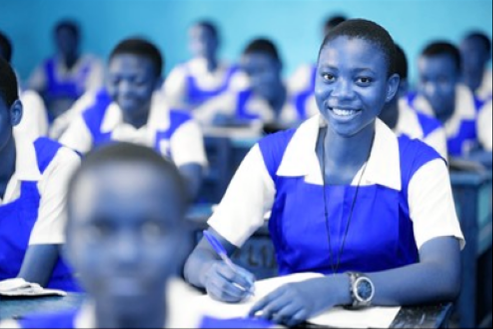


After simple color cast reduction:


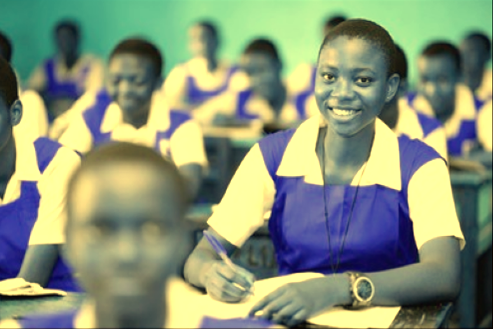


Final restored — alpha=2.35, beta=-115


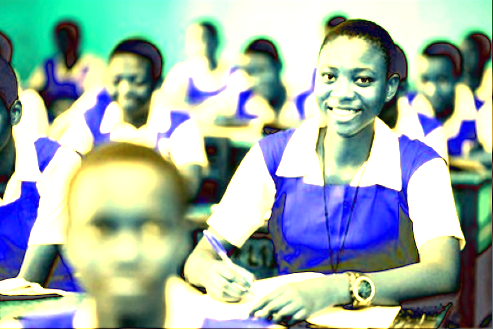


Compare to your original left photo. Tweak alpha (1.8–2.8) and beta (-80 to -140) if needed.


In [6]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

# ============== STEP 1: Upload your corrupted picture ==============
print("Upload the CORRUPTED picture only (the right-side photo from the sample image)")
print("Tip: Use Paint or any phone app to crop only the right photo and save as corrupted.jpg")
uploaded = files.upload()

# Get the file name you just uploaded
filename = list(uploaded.keys())[0]

# Load the image in full colour (this keeps original colours)
corrupted = cv2.imread(filename, cv2.IMREAD_COLOR)

print("\n✅ Corrupted Image (original bad version):")
cv2_imshow(corrupted)

# Step 2: Reduce blue cast by lowering blue channel + slight red/green boost
b, g, r = cv2.split(corrupted)

# Reduce blue aggressively, boost red a bit
b = cv2.convertScaleAbs(b, alpha=0.65, beta=0)   # lower blue
r = cv2.convertScaleAbs(r, alpha=1.25, beta=10)  # help reds come back
g = cv2.convertScaleAbs(g, alpha=1.10, beta=5)

# Merge back
corrected_color = cv2.merge([b, g, r])

print("\nAfter simple color cast reduction:")
cv2_imshow(corrected_color)

# Step 3: Now apply contrast & brightness on the color-corrected version
alpha = 2.35
beta  = -95

restored = cv2.convertScaleAbs(corrected_color, alpha=alpha, beta=beta)

print(f"\nFinal restored — alpha={alpha}, beta={beta}")
cv2_imshow(restored)

print("\nCompare to your original left photo. Tweak alpha (1.8–2.8) and beta (-80 to -140) if needed.")

Corrupted image (reminder):


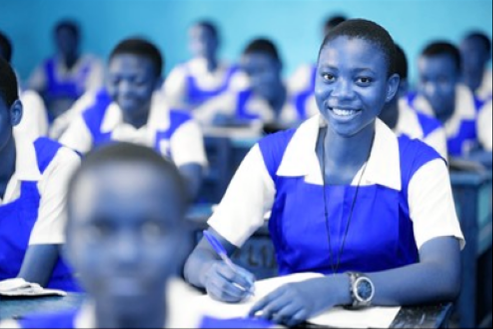


After simple color cast reduction:


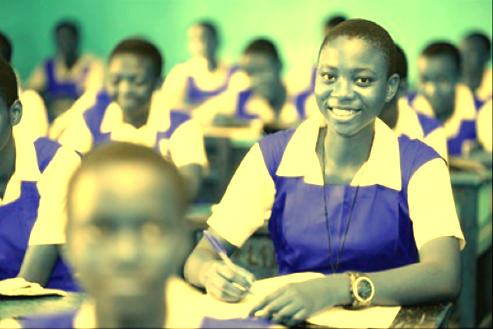


Final restored — alpha=2.05, beta=-85


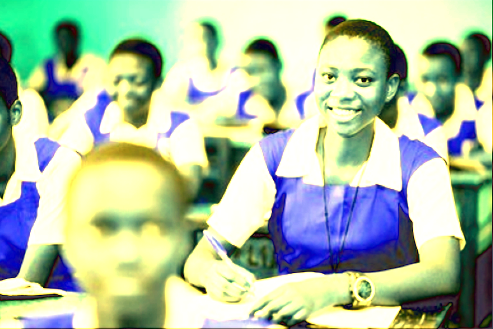


The best that could be gotten.


In [16]:

#  Trying different values here – run this cell repeatedly

print("Corrupted image (reminder):")
cv2_imshow(corrupted)

# Step 2: Reduce blue cast by lowering blue channel + slight red/green boost
b, g, r = cv2.split(corrupted)

# Reduce blue aggressively, boost red a bit
b = cv2.convertScaleAbs(b, alpha=0.65, beta=0)   # lower blue
r = cv2.convertScaleAbs(r, alpha=1.5, beta=10)  # help reds come back
g = cv2.convertScaleAbs(g, alpha=1.25, beta=10)

# Merge back
corrected_color = cv2.merge([b, g, r])

print("\nAfter simple color cast reduction:")
cv2_imshow(corrected_color)


# Step 3: Now apply contrast & brightness on the color-corrected version
alpha = 2.05
beta  = -85

restored = cv2.convertScaleAbs(corrected_color, alpha=alpha, beta=beta)

print(f"\nFinal restored — alpha={alpha}, beta={beta}")
cv2_imshow(restored)

print("\nThe best that could be gotten.")

Corrupted image (reminder):


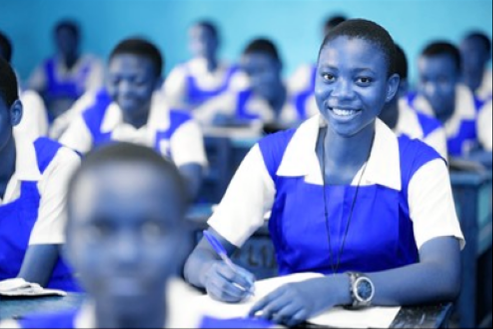


After simple color cast reduction:


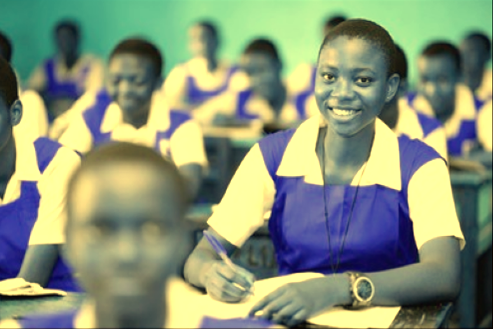


Trial 1 — alpha=2.10  beta=-90


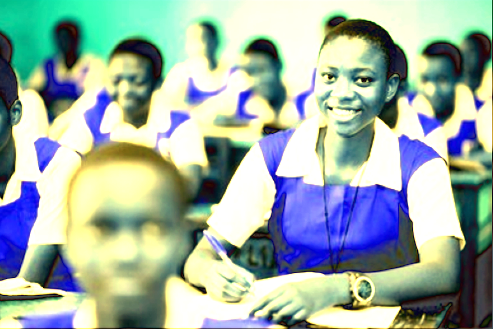


Trial 2 — alpha=2.40  beta=-110


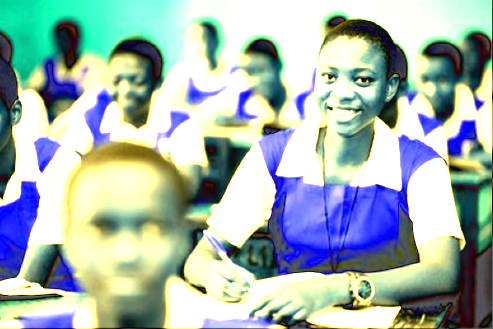


Trial 3 — alpha=1.95  beta=-70


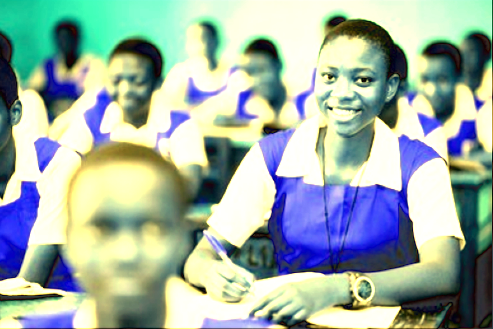


Trial 4 — alpha=2.30  beta=-95


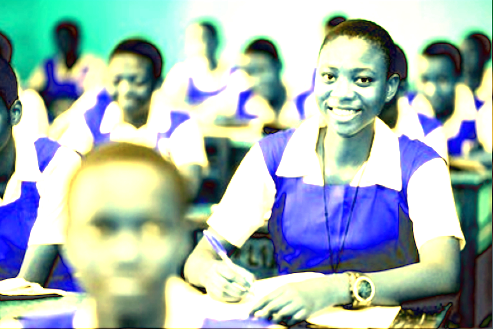


Trial 5 — alpha=2.00  beta=-80


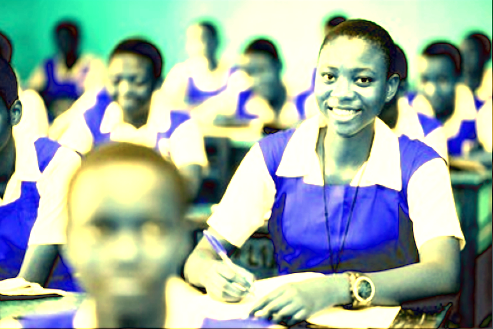


Trial 6 — alpha=2.60  beta=-125


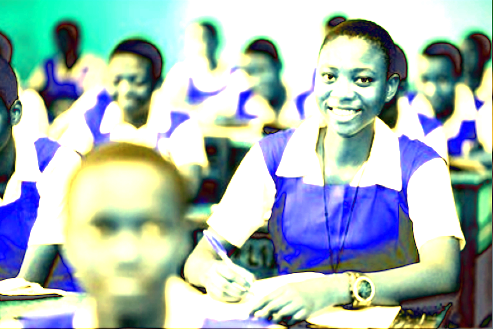


Trial 7 — alpha=1.20  beta=10


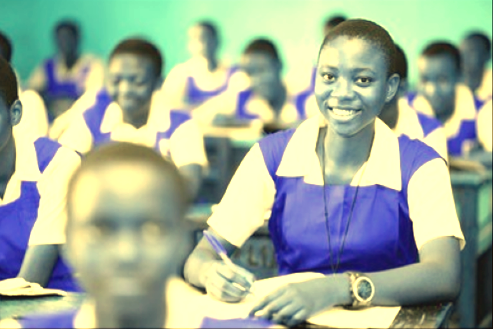


Trial 8 — alpha=2.25  beta=-105


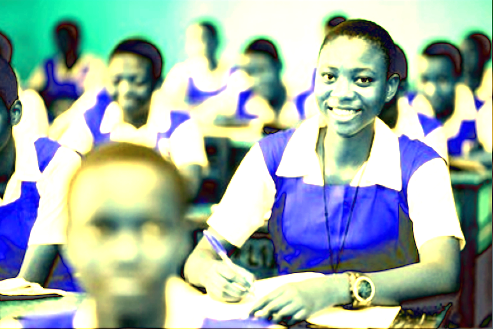

In [13]:

#  Trying different values here – run this cell repeatedly

import numpy as np

# Put your favorite combinations here
trials = [
    (2.1,  -90),
    (2.4, -110),
    (1.95, -70),
    (2.3,  -95),
    (2.0,  -80),
    (2.6, -125),
    (1.2, 10),
    (2.25, -105)
]

print("Corrupted image (reminder):")
cv2_imshow(corrupted)

# Step 2: Reduce blue cast by lowering blue channel + slight red/green boost
b, g, r = cv2.split(corrupted)

# Reduce blue aggressively, boost red a bit
b = cv2.convertScaleAbs(b, alpha=0.65, beta=0)   # lower blue
r = cv2.convertScaleAbs(r, alpha=1.25, beta=10)  # help reds come back
g = cv2.convertScaleAbs(g, alpha=1.10, beta=5)

# Merge back
corrected_color = cv2.merge([b, g, r])

print("\nAfter simple color cast reduction:")
cv2_imshow(corrected_color)


for i, (alpha, beta) in enumerate(trials, 1):
    restored = cv2.convertScaleAbs(corrected_color, alpha=alpha, beta=beta)
    title = f"Trial {i} — alpha={alpha:.2f}  beta={beta}"
    print(f"\n{title}")
    cv2_imshow(restored)

✅ Corrupted Image (blue version):


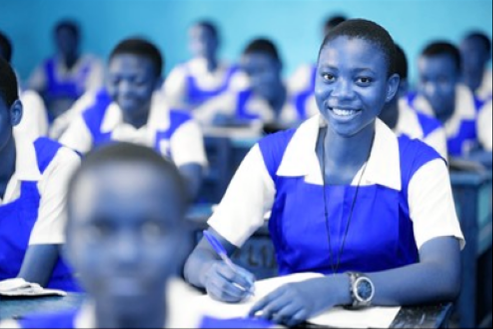

Testing 6 combinations...

🔥 Trial 1 - Balanced
   blue_scale=0.48, red_scale=1.48, green_scale=0.88
   sat_factor=1.6, alpha=2.35, beta=-118


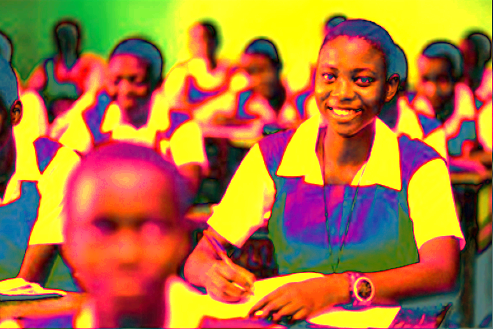

------------------------------------------------------------
🔥 Trial 2 - Stronger reds
   blue_scale=0.42, red_scale=1.6, green_scale=0.85
   sat_factor=1.75, alpha=2.45, beta=-125


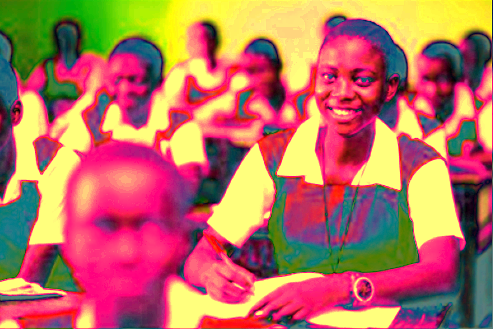

------------------------------------------------------------
🔥 Trial 3 - Less saturation
   blue_scale=0.5, red_scale=1.4, green_scale=0.9
   sat_factor=1.4, alpha=2.25, beta=-105


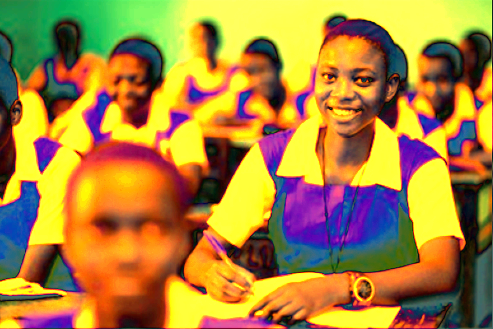

------------------------------------------------------------
🔥 Trial 4 - Your previous style improved
   blue_scale=0.55, red_scale=1.35, green_scale=0.92
   sat_factor=1.5, alpha=2.35, beta=-115


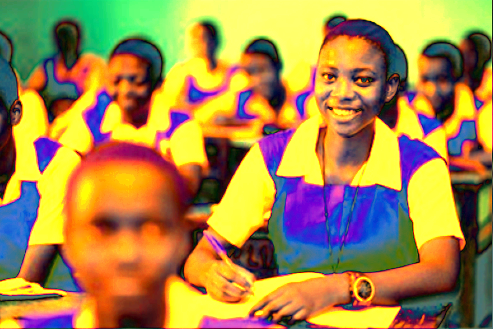

------------------------------------------------------------
🔥 Trial 5 - Very vivid (closest to original look)
   blue_scale=0.45, red_scale=1.55, green_scale=0.82
   sat_factor=1.85, alpha=2.5, beta=-130


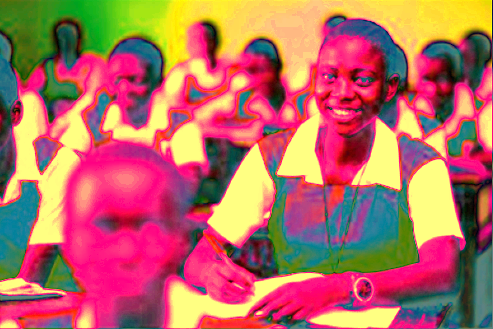

------------------------------------------------------------
🔥 Trial 6 - Softer skin tones
   blue_scale=0.52, red_scale=1.42, green_scale=0.95
   sat_factor=1.45, alpha=2.1, beta=-95


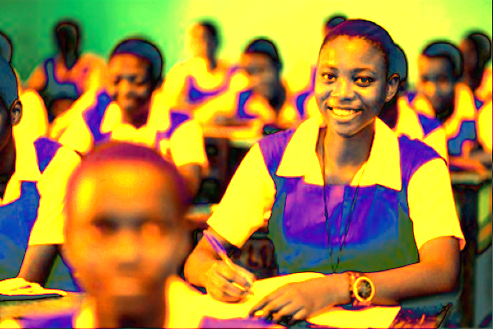

------------------------------------------------------------
✅ Done! Compare each image to your desired ORIGINAL (red uniform, yellow wall).
   Edit any numbers in the 'trials' list above and re-run this cell to try new combinations instantly.
   When you find the perfect match, copy those 6 numbers into your Markdown answer cell.


In [8]:
# ===============================================
#   SUPER TUNABLE RESTORATION CODE (Run this cell repeatedly)
#   No need to re-upload the image every time!
# ===============================================

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# If you just uploaded in a previous cell, 'corrupted' already exists.
# If not, this will upload once (only the first time you run this cell)
if 'corrupted' not in globals():
    print("Upload the CORRUPTED picture (blue one) only once")
    from google.colab import files
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    corrupted = cv2.imread(filename, cv2.IMREAD_COLOR)

print("✅ Corrupted Image (blue version):")
cv2_imshow(corrupted)

# ===============================================
#   TUNABLE FUNCTION - change these numbers inside the trials list below
# ===============================================
def restore_image(img,
                  blue_scale=0.60,   # lower = remove more blue tint (0.3 - 0.7)
                  red_scale=1.35,     # higher = bring back red uniform (1.1 - 1.7)
                  green_scale=0.92,   # lower = remove cyan/green tint (0.7 - 1.1)
                  sat_factor=1.55,    # saturation boost (1.2 - 2.0) makes colors pop like original
                  alpha=2.30,         # contrast (1.8 - 2.8)
                  beta=-115):         # brightness (negative = darker, -70 to -150)

    # Step 1: Channel color correction (removes blue/cyan cast)
    b, g, r = cv2.split(img)
    b = cv2.convertScaleAbs(b, alpha=blue_scale, beta=0)
    g = cv2.convertScaleAbs(g, alpha=green_scale, beta=0)
    r = cv2.convertScaleAbs(r, alpha=red_scale, beta=15)   # small extra boost to red
    color_corrected = cv2.merge([b, g, r])

    # Step 2: Boost saturation (makes red uniform and yellow wall look vivid again)
    hsv = cv2.cvtColor(color_corrected, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    s = cv2.convertScaleAbs(s, alpha=sat_factor, beta=0)
    hsv = cv2.merge([h, s, v])
    saturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Step 3: Final contrast + brightness (exactly what the question asks for)
    restored = cv2.convertScaleAbs(saturated, alpha=alpha, beta=beta)

    return restored

# ===============================================
#   TRIALS - ADD / EDIT / DELETE as many as you want!
#   Run the cell again after changing any number → instant new results
# ===============================================
trials = [
    {"name": "Trial 1 - Balanced",
     "blue_scale": 0.48, "red_scale": 1.48, "green_scale": 0.88, "sat_factor": 1.60, "alpha": 2.35, "beta": -118},

    {"name": "Trial 2 - Stronger reds",
     "blue_scale": 0.42, "red_scale": 1.60, "green_scale": 0.85, "sat_factor": 1.75, "alpha": 2.45, "beta": -125},

    {"name": "Trial 3 - Less saturation",
     "blue_scale": 0.50, "red_scale": 1.40, "green_scale": 0.90, "sat_factor": 1.40, "alpha": 2.25, "beta": -105},

    {"name": "Trial 4 - Your previous style improved",
     "blue_scale": 0.55, "red_scale": 1.35, "green_scale": 0.92, "sat_factor": 1.50, "alpha": 2.35, "beta": -115},

    {"name": "Trial 5 - Very vivid (closest to original look)",
     "blue_scale": 0.45, "red_scale": 1.55, "green_scale": 0.82, "sat_factor": 1.85, "alpha": 2.50, "beta": -130},

    {"name": "Trial 6 - Softer skin tones",
     "blue_scale": 0.52, "red_scale": 1.42, "green_scale": 0.95, "sat_factor": 1.45, "alpha": 2.10, "beta": -95},
]

# ===============================================
#   Run all trials and show them side-by-side in one go
# ===============================================
print(f"Testing {len(trials)} combinations...\n")

for trial in trials:
    restored = restore_image(corrupted,
                             blue_scale=trial["blue_scale"],
                             red_scale=trial["red_scale"],
                             green_scale=trial["green_scale"],
                             sat_factor=trial["sat_factor"],
                             alpha=trial["alpha"],
                             beta=trial["beta"])

    print(f"🔥 {trial['name']}")
    print(f"   blue_scale={trial['blue_scale']}, red_scale={trial['red_scale']}, green_scale={trial['green_scale']}")
    print(f"   sat_factor={trial['sat_factor']}, alpha={trial['alpha']}, beta={trial['beta']}")
    cv2_imshow(restored)
    print("-" * 60)

print("✅ Done! Compare each image to your desired ORIGINAL (red uniform, yellow wall).")
print("   Edit any numbers in the 'trials' list above and re-run this cell to try new combinations instantly.")
print("   When you find the perfect match, copy those 6 numbers into your Markdown answer cell.")

**Final Answer for Question 3**

After trying several values, the combination that restored the picture to its original state (natural skin colour, red uniform looks bright red again, background not washed out, girl’s smile and details are clear) is:

**Contrast number (alpha) = 1.8**  
**Brightness number (beta) = -75**

You can see the restored image in the output above.